In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


PyGSM quickstart
------------------

Firstly, we import the `pygsm` module:

In [4]:
from pygsm import GlobalSkyModel

We can very quickly get started with generating a sky map and plotting it:

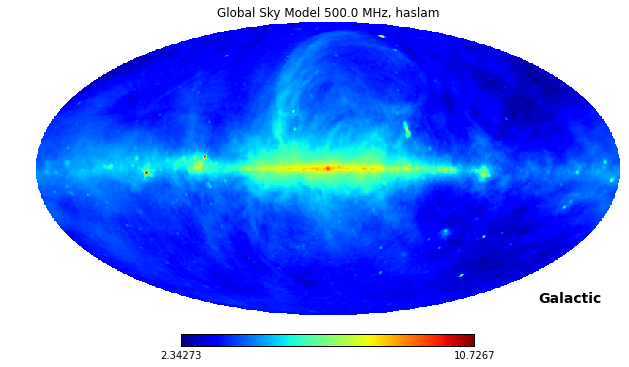

In [6]:
gsm = GlobalSkyModel()
gsm.generate(500)
gsm.view(logged=True)

We might then want to write this to a FITS file (in healpix format):

In [7]:
gsm.write_fits("gsm_500mhz.fits")

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.misc]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


There are also a few options we can play around with. For example:

* let's change to use a different interpolation method (pchip) 
* instead of using the Haslam 408 MHz map for structure, let's use WMAP 23 GHz
* instead of using MHz to define the units, let's use GHz

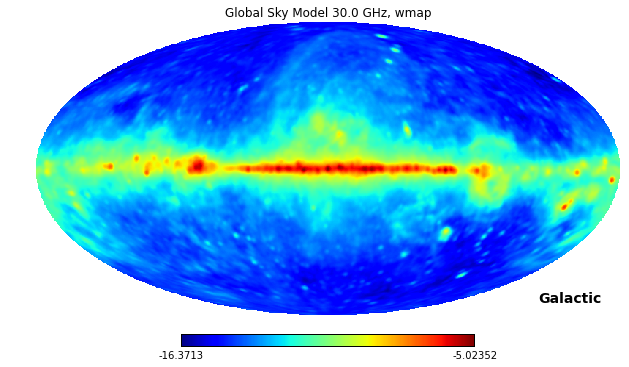

In [11]:
gsm = GlobalSkyModel(freq_unit='GHz', interpolation='pchip', basemap='wmap')
gsm.generate(30) # Generate at 30 GHz
gsm.view(logged=True)

You can set things on the fly, too, once you've got a `gsm` object:

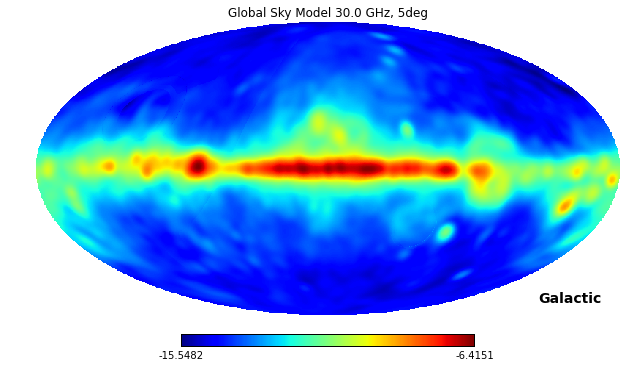

In [13]:
gsm.set_basemap('5deg')
gsm.view(logged=True)

Just in case you're interested in spectral cubes, you can even pass a frequency range:

(100, 3145728)


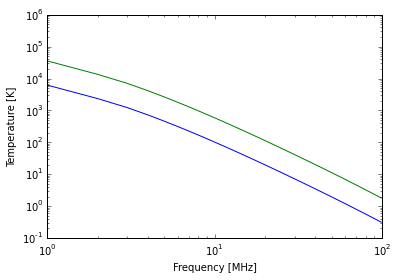

In [19]:
gsm = GlobalSkyModel()
freqs = np.linspace(10, 1000, 100)
map_cube = gsm.generate(freqs)

print map_cube.shape
plt.loglog(map_cube[:,0])
plt.loglog(map_cube[:,12345])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Temperature [K]")

Be careful with this one though, as it can eat up a lot of memory!